In [2]:
import polars as pl
import matplotlib.pyplot as plt
import numpy as np

In [28]:
df = pl.read_csv("test.csv")

R_FULL,R_NOINT,R_NOA,R_NOOOB,C_FULL
i64,f64,f64,f64,f64
1,0.7,0.6,0.5,0.2


In [46]:
REAL_LABELS = {
    "R_FULL": "Rust (Full)",
    "R_NOINT": "Rust (No Integer Overflow)",
    "R_NOA": "Rust (No Arithmetic Check)",
    "R_NOOOB": "Rust (No Out-of-Bounds)",
    "C_FULL": "C (Full)",
}

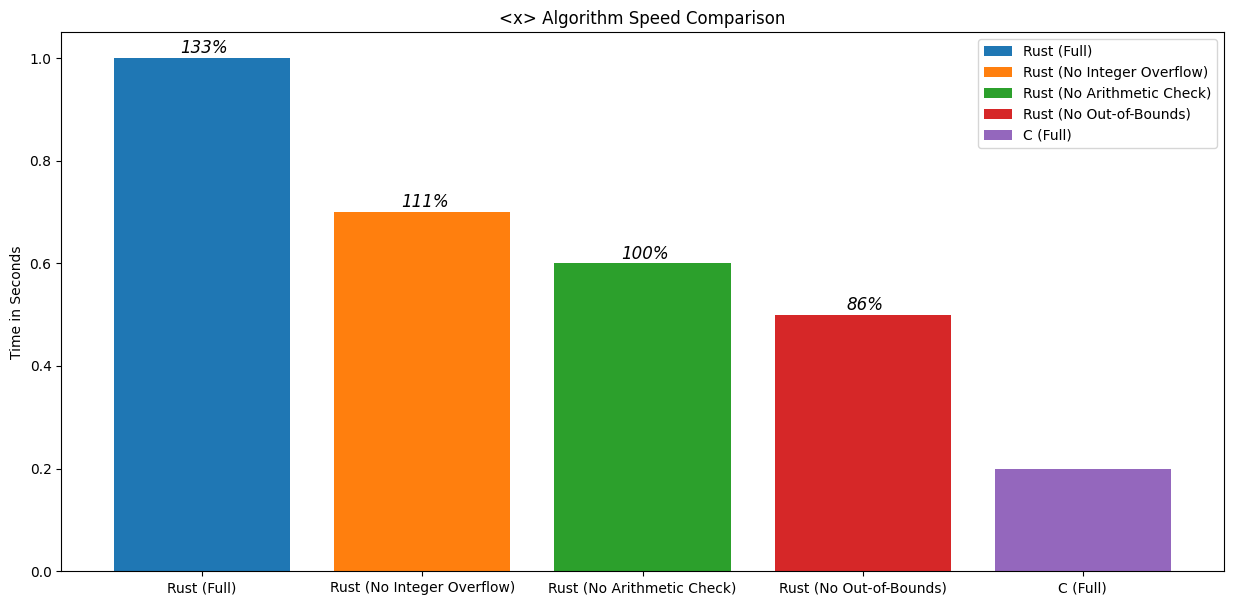

In [140]:
x = np.arange(len(df.columns))
width = 0.25
m = 0

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot()

C_FULL_VAL = df["C_FULL"][0]
# Categories are R_FULL, NOINT, NOA, NOOOB, C_FULL
for i, col in enumerate(df.columns):
    bar = ax.bar(i, df[col][0], label=REAL_LABELS[col])
    value = df[col][0]

    # C is not annotated:
    if i != len(df.columns) - 1:
        # Get percentage difference:
        diff = round((abs(C_FULL_VAL-value) / ((C_FULL_VAL+value)/2)) * 100.0)
        
        percentage = ax.annotate(str(diff) + "%", xy=(i + 0.01, df[col][0]+0.009))
        percentage.set_horizontalalignment("center")
        percentage.set_fontsize("large")
        percentage.set_fontstyle("italic")

ax.set_ylabel("Time in Seconds")
ax.set_title("<x> Algorithm Speed Comparison")
ax.set_xticks(x)
ax.set_xticklabels(list(REAL_LABELS.values()))
ax.legend()
